In [1]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms.functional as TF
import cv2
from PIL import Image

In [2]:
data = pd.read_csv("design-seeds.csv")

In [3]:
class NaiveRecolorDataset(torch.utils.data.Dataset):
    def __init__(self, data, multiplier):
        assert multiplier % 2 == 1
        self.data = data
        
    def __getitem__(self, index):
        hue_shift = (index % multiplier - (multiplier - 1)/2) / (multiplier - 1)
        i = index // multiplier # actual image index (from data directory)
        
        image = Image.open(self.data["image_path"].iloc[i])
        image = TF.adjust_hue(image, hue_shift)
        
        # use torchvision.transforms.Resize ???
        
        palette = Image.fromarray(np.load(self.data["palette_path"].iloc[i]).astype(np.uint8))
        palette = TF.adjust_hue(palette, hue_shift)
        
        image = TF.to_tensor(image)
        palette = TF.to_tensor(palette)
        return image, palette
    
    def __len__(self):
        return len(data) * 18

In [4]:
multiplier = 21

In [5]:
dataset = NaiveRecolorDataset(data, multiplier=multiplier)

In [6]:
from torchvision import transforms

data_loader = torch.utils.data.DataLoader(dataset, batch_size=multiplier)

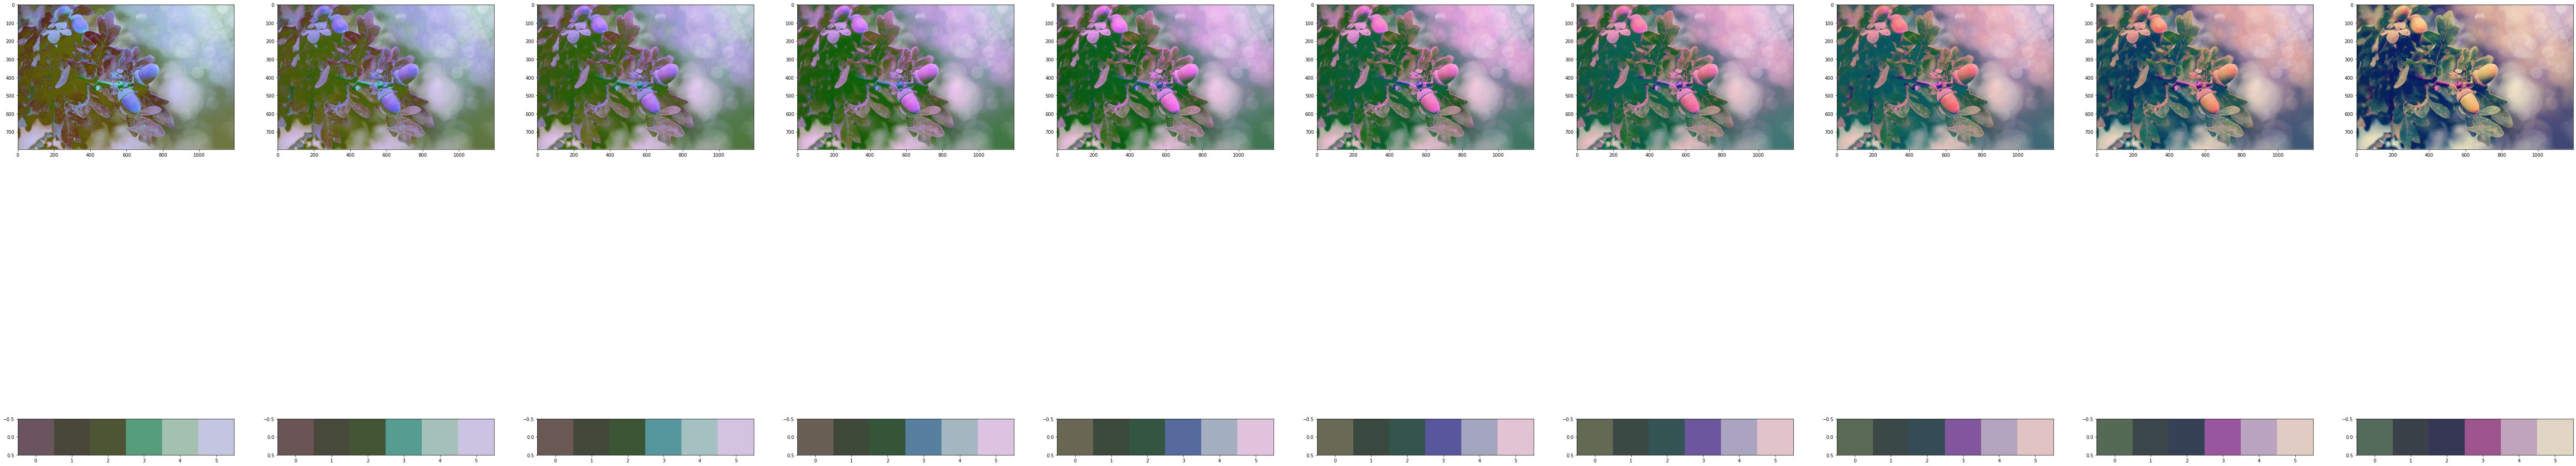

In [7]:
# plot first 10 images
batch = next(iter(data_loader))
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=2, ncols=10, figsize=(100, 100))
for i in range(10):
    ax[0, i].imshow((batch[0][i].transpose(0, 2).transpose(0, 1)*255).int())
    ax[1, i].imshow((batch[1][i].transpose(0, 2).transpose(0, 1)*255).int())
plt.subplots_adjust(bottom=0.8, top=1)
plt.show()

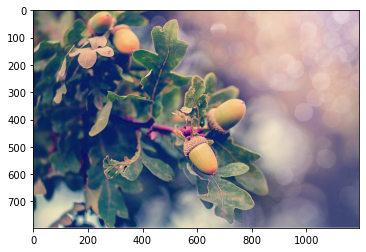

In [12]:
plt.imshow(batch[0][9].permute(1, 2, 0))